Import libraries and read the csv

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
df = pd.read_csv("faults_registers_old.csv")
#df = pd.read_csv("faults_memory.csv")
display(df)

,attempt,stop_addr,stop_fn,delay,target,bitflip,code
0,0,0x080195ec,Reset_Handler,0.0028,0x20005c3d,16,0
1,1,0x080195ea,Reset_Handler,0.0026,0x20005b02,32,0
2,2,0x080195e6,Reset_Handler,0.0052,0x200096eb,8,0
3,3,0x08000f22,HAL_RCC_OscConfig,0.0080,0x2000daef,8,0
4,4,0x080195e6,Reset_Handler,0.0036,0x200077bb,2,0
...,...,...,...,...,...,...,...
29896,7037,0x080031ec,vListInsert,1.4130,0x2000ae75,2,0
29897,0,0x0801a8a2,Reset_Handler,0.0030,0x2000a53a,16,0
29898,1,0x0801a8a4,Reset_Handler,0.0022,0x2000b344,32,0
29899,2,0x0801a8a4,Reset_Handler,0.0070,0x20004b84,16,0


In [50]:
cfgv_functions = pd.read_csv('../compiled_cfgv_functions.csv')
eddi_functions = pd.read_csv('../compiled_eddi_functions.csv')
cfgv_functions.equals(eddi_functions) # we are compiling the exact same functions with both mechanisms

True

The set of compiled functions coincides between the two passes

In [51]:
compiled_functions = cfgv_functions

In [52]:
sz_tot = df.shape[0]
df_errcodes = df.groupby('code')
sz_df_errcodes = df_errcodes.size()

In [53]:
num_crash = sz_df_errcodes[-1]           # crash     = -1
num_silent = sz_df_errcodes[-2]          # sdc       = -2
num_freeze = sz_df_errcodes[-3]          # froze     = -3 (stuck into an infinite loop)
num_detect_eddi = sz_df_errcodes[1]      # eddi detect    =  1
num_detect_cfgv = sz_df_errcodes[2]      # cfgi detect    = 2

tot_faults = num_crash + num_silent + num_freeze + num_detect_cfgv + num_detect_eddi

In [54]:
tot_faults, sz_tot

(217, 29901)

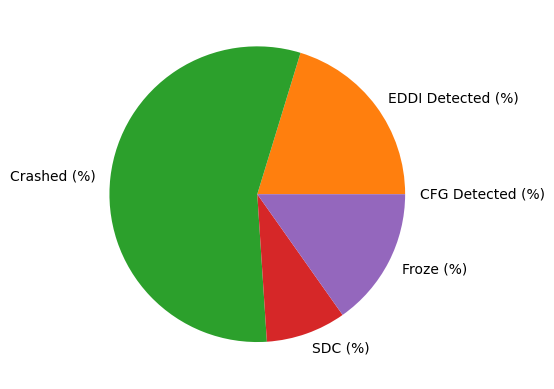

In [55]:
labels = 'CFG Detected (%)', 'EDDI Detected (%)', 'Crashed (%)','SDC (%)', 'Froze (%)'
plt.pie([num_detect_cfgv/tot_faults, num_detect_eddi/tot_faults, num_crash/tot_faults, num_silent/tot_faults, num_freeze/tot_faults], labels = labels)
plt.show()

In [56]:
df_onehot = pd.get_dummies(df['code'], prefix="Code")
df1 = df.join(df_onehot)
df1 = df1.groupby(['stop_fn']).sum(numeric_only=True)
plot = df1[df1['code'] != 0].plot(y=['Code_1', 'Code_2', 'Code_-1', 'Code_-2', 'Code_-3'],
                                  kind="barh",
                                  figsize=(15,15),
                                  title = 'Faults distribution for each function',)

KeyError: "['Code_2'] not in index"

In [ ]:
df['fn_name'] = df['stop_fn']
df = pd.merge(df, compiled_functions, on='fn_name')

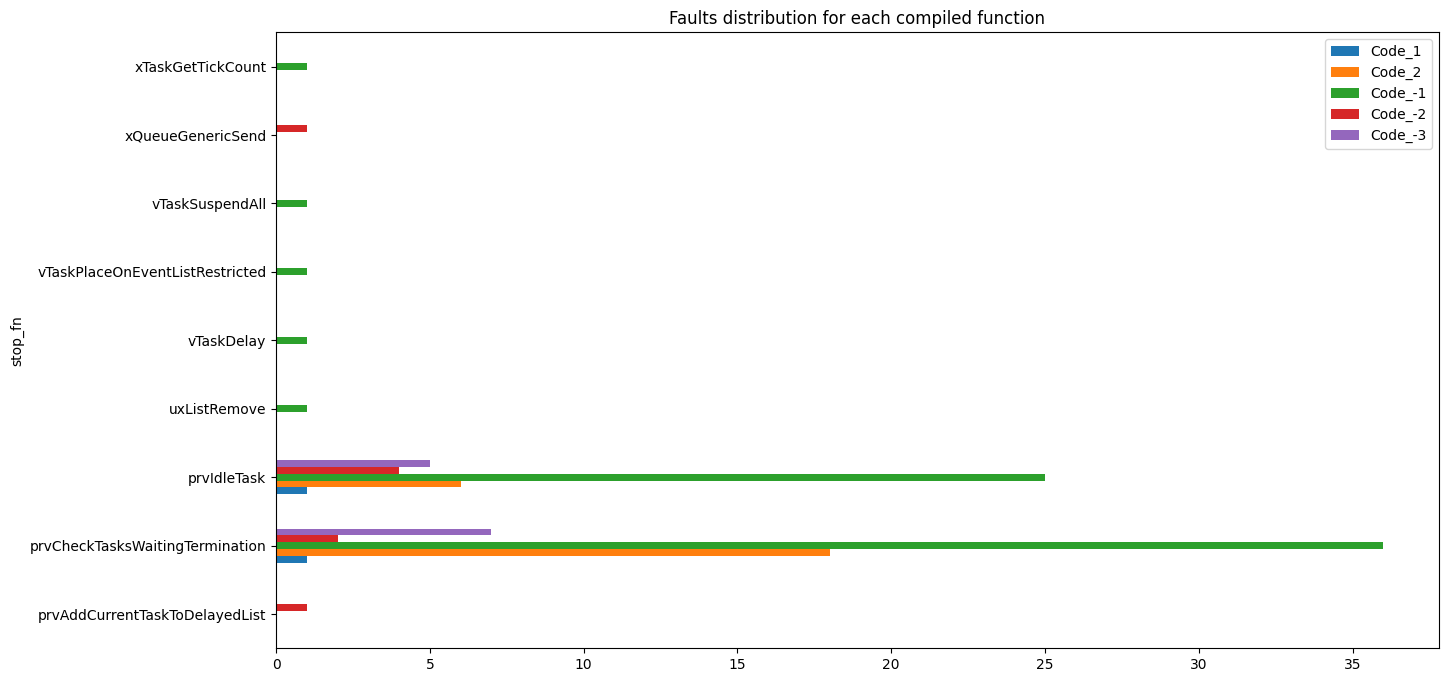

In [ ]:
df_onehot = pd.get_dummies(df['code'], prefix="Code")
df1 = df.join(df_onehot)
df1 = df1.groupby(['stop_fn']).sum(numeric_only=True)
plot = df1[df1['code'] != 0].plot(y=['Code_1', 'Code_2', 'Code_-1', 'Code_-2', 'Code_-3'],
                                  kind="barh",
                                  figsize=(15,8),
                                  title = 'Faults distribution for each compiled function',)

In [ ]:
set_faulty_funcs = set(df1.index)
set_compil_funcs = set(compiled_functions['fn_name'])

In [ ]:
print("Number of functions compiled and faulty:", len(set_compil_funcs.intersection(set_faulty_funcs)))
print("Number of functions not compiled but faulty:", len(set_faulty_funcs.difference(set_compil_funcs)))

Number of functions compiled and faulty: 55
Number of functions not compiled but faulty: 0
